## Import Libraries

In [1]:
## for loading and preprocessing 
import pandas as pd
import numpy as np 

## for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

## splitting dataset
from sklearn.model_selection import train_test_split

## feature engineering 
from sklearn.feature_extraction import DictVectorizer

## load regression model 
from sklearn.linear_model import LinearRegression

## 
from sklearn.ensemble import RandomForestRegressor

## evaluation metric 
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

## Loading Data & Creating Copy

In [2]:
## read dataset
data = pd.read_csv("Dataset/used_device_data.csv")

In [3]:
## create a deep copy 
df = data.copy()

## Data Preview And Understanding
- Loading the dataset

In [4]:
## view the first rows 
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


In [5]:
## view the last five rows 
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.50,89.33
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.81,154.12
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.65,78.05
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.92,77.46
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,72.24,62.31


In [6]:
## check the number of rows and columns 
print(f'Total number of rows: {df.shape[0]} -> Total number of columns: {df.shape[1]}')

Total number of rows: 3454 -> Total number of columns: 15


In [7]:
## get a summary description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


In [8]:
## checking type on columns
df.dtypes

brand_name           object
os                   object
screen_size         float64
4g                   object
5g                   object
main_camera_mp      float64
selfie_camera_mp    float64
int_memory          float64
ram                 float64
battery             float64
weight              float64
release_year          int64
days_used             int64
new_price           float64
used_price          float64
dtype: object

In [9]:
## checking for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [10]:
## checking for duplicated values 
df.duplicated().sum()

0

In [11]:
print(np.unique(df["used_price"]))

[  4.65   4.82   5.04 ... 472.94 665.44 749.52]


## Data Preprocessing
- Change data type of "4g" and "5g" to category
- fill in the null values of "main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"

In [12]:
## convert the 4g column type to category
## df['4g'] = df['4g'].astype('category')

In [13]:
## convert the 4g column type to category
## df['5g'] = df['5g'].astype('category')

In [14]:
## finding the mean of main_camera_mp
df['main_camera_mp'].mean()
mean_age = round(df['main_camera_mp'].mean(), 0)
mean_age

9.0

In [15]:
## filling the null values in the main_camera_mp column with the mean age

df['main_camera_mp'] = df['main_camera_mp'].fillna(mean_age)

In [16]:
## finding the mean of main_camera_mp
df['selfie_camera_mp'].mean()
mean_age = round(df['selfie_camera_mp'].mean(), 0)
mean_age

7.0

In [17]:
## filling the null values in the main_camera_mp column with the mean age

df['selfie_camera_mp'] = df['selfie_camera_mp'].fillna(mean_age)

In [18]:
## finding the mean of int_memory
df['int_memory'].mean()
mean_age = round(df['int_memory'].mean(), 0)
mean_age

55.0

In [19]:
## filling the null values in the int_memory column with the mean value

df['int_memory'] = df['int_memory'].fillna(mean_age)

In [20]:
## finding the mean of ram
df['ram'].mean()
mean_age = round(df['ram'].mean(), 0)
mean_age

4.0

In [21]:
## filling the null values in the int_memory column with the mean value

df['ram'] = df['ram'].fillna(mean_age)

In [22]:
## finding the mean of battery
df['battery'].mean()
mean_age = round(df['battery'].mean(), 0)
mean_age

3133.0

In [23]:
## filling the null values in the int_memory column with the mean value

df['battery'] = df['battery'].fillna(mean_age)

In [24]:
## finding the mean of weight
df['weight'].mean()
mean_age = round(df['weight'].mean(), 0)
mean_age

183.0

In [25]:
## filling the null values in the int_memory column with the mean value

df['weight'] = df['weight'].fillna(mean_age)

In [26]:
## checking for missing values
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

## Exploratory Data Analysis
- statistical summary
- Target variable analysis
- Plot a coorelation againts the target variable

In [27]:
df.describe().round()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0,3454.0
mean,14.0,9.0,7.0,55.0,4.0,3133.0,183.0,2016.0,675.0,237.0,92.0
std,4.0,5.0,7.0,85.0,1.0,1299.0,88.0,2.0,249.0,194.0,55.0
min,5.0,0.0,0.0,0.0,0.0,500.0,69.0,2013.0,91.0,18.0,5.0
25%,13.0,5.0,2.0,16.0,4.0,2100.0,142.0,2014.0,534.0,120.0,56.0
50%,13.0,9.0,5.0,32.0,4.0,3000.0,160.0,2016.0,690.0,190.0,82.0
75%,15.0,13.0,8.0,64.0,4.0,4000.0,185.0,2018.0,869.0,291.0,116.0
max,31.0,48.0,32.0,1024.0,12.0,9720.0,855.0,2020.0,1094.0,2560.0,750.0


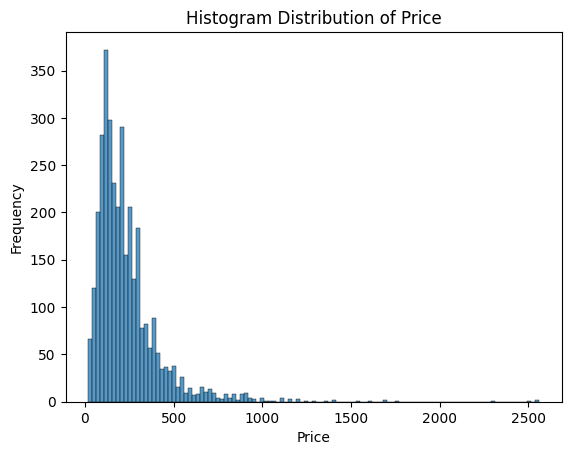

In [28]:

sns.histplot(df['new_price'])

plt.title('Histogram Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

In [29]:
## log transformation 
log_price = np.log1p(df['new_price'])

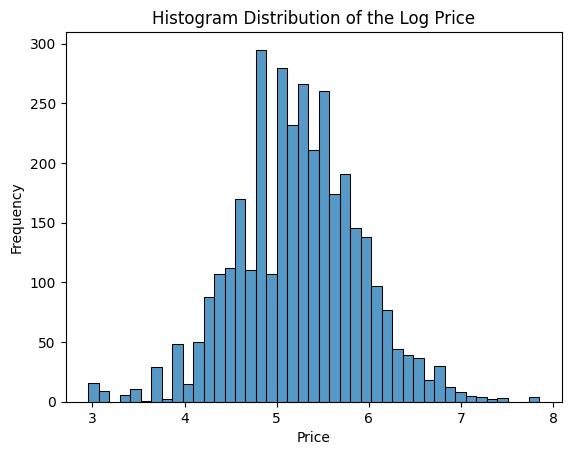

In [30]:
sns.histplot(log_price)

plt.title('Histogram Distribution of the Log Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()


In [31]:
## performing a coorelation on numerical column
## select numerical ..
numerical_cols = df.select_dtypes(exclude=[object])
corr_matrix = numerical_cols.corr() 
corr_matrix['new_price']

screen_size         0.340895
main_camera_mp      0.338124
selfie_camera_mp    0.414290
int_memory          0.368927
ram                 0.494048
battery             0.370291
weight              0.219009
release_year        0.303571
days_used          -0.246353
new_price           1.000000
used_price          0.809335
Name: new_price, dtype: float64

In [32]:
## correlation for non-merical 

## Building A Validation Framework / Splitting Dataset
- Training set 60 %
- Validation dataset 20%
- Test dataset 20%


In [33]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11) 

print(f'Train set {len(df_train)}')
print(f'Valid set {len(df_valid)}')
print(f'Test set {len(df_test)}')


Train set 2072
Valid set 691
Test set 691


In [34]:
df_train.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2957,Xiaomi,Android,12.70,yes,no,13.0,5.0,64.0,4.0,4100.0,150.0,2017,881,111.10,88.15
3210,Huawei,Android,16.69,yes,no,13.0,16.0,128.0,8.0,4100.0,197.0,2019,369,305.99,123.09
1997,Motorola,Android,12.70,yes,no,8.0,5.0,32.0,4.0,2800.0,137.0,2016,563,130.98,50.37
654,Apple,iOS,25.53,yes,no,12.0,7.0,64.0,4.0,8134.0,469.0,2017,629,730.75,198.50
1287,Huawei,Android,15.24,yes,no,13.0,24.0,256.0,4.0,4000.0,183.0,2018,658,1300.24,250.39


In [35]:
## selecting target column and converting it to a vector format
y_train = np.log1p(df_train['new_price']).values
y_valid = np.log1p(df_valid['new_price']).values
y_test = np.log1p(df_test['new_price']).values
y_train_full = np.log1p(df_train_full['new_price']).values

In [36]:
#y_train

In [37]:
del df_train['new_price']
del df_valid['new_price']
del df_test['new_price']
del df_train_full['new_price']

In [38]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


## Train A Baseline Regression Model
- Selecting baseline features
- Train a regression model

In [39]:
baseline_features = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram','battery','weight','release_year','days_used','used_price']

df_train_bl = df_train[baseline_features]

In [40]:
X_train_bl = df_train_bl.values
X_train_bl

array([[  12.7 ,   13.  ,    5.  , ..., 2017.  ,  881.  ,   88.15],
       [  16.69,   13.  ,   16.  , ..., 2019.  ,  369.  ,  123.09],
       [  12.7 ,    8.  ,    5.  , ..., 2016.  ,  563.  ,   50.37],
       ...,
       [  16.28,    9.  ,   16.  , ..., 2018.  ,  496.  ,  148.42],
       [  12.83,    8.  ,   20.  , ..., 2017.  ,  778.  ,  156.35],
       [  12.7 ,    8.  ,    5.  , ..., 2016.  ,  789.  ,   57.66]])

In [41]:
## lets train model 
model = LinearRegression() 
model.fit(X_train_bl, y_train)


LinearRegression()

## Model Evaluation
- Generate the validation predictions
- Compare the validation predictions to the actual predictions
- Return an accuracy score
  

In [42]:
## generate validation baseline features 
df_valid_bl = df_valid[baseline_features]

## convert dataframe into numpy array
X_valid_bl = df_valid_bl.values 

In [43]:
X_valid_bl

array([[1.524e+01, 1.600e+01, 8.000e+00, ..., 2.016e+03, 6.090e+02,
        1.183e+02],
       [2.032e+01, 1.300e+01, 5.000e+00, ..., 2.019e+03, 2.330e+02,
        9.140e+01],
       [1.527e+01, 8.000e+00, 5.000e+00, ..., 2.019e+03, 2.960e+02,
        7.534e+01],
       ...,
       [1.029e+01, 8.000e+00, 2.000e+00, ..., 2.013e+03, 1.042e+03,
        4.005e+01],
       [1.450e+01, 1.300e+01, 5.000e+00, ..., 2.019e+03, 2.350e+02,
        5.583e+01],
       [1.778e+01, 3.000e+00, 3.000e-01, ..., 2.013e+03, 9.320e+02,
        8.412e+01]])

In [44]:
## generate our validation prediction
y_valid_pred = model.predict(X_valid_bl)

In [45]:
acc_score = model.score(X_valid_bl, y_valid) 

print(f'Baseline Validation Accuracy: {acc_score}')

Baseline Validation Accuracy: 0.7185749919187637


In [46]:

rsquared_acc = r2_score(y_valid, y_valid_pred)

In [47]:
print(f'Mean Accuracy for the Model: {rsquared_acc}')

Mean Accuracy for the Model: 0.7185749919187637


In [48]:
y_train_pred = model.predict(X_train_bl)

r2 = r2_score(y_train, y_train_pred) 

print(f'{r2}')

0.7093959259718838


In [49]:
df_train.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'used_price'],
      dtype='object')

In [50]:
df.dtypes

brand_name           object
os                   object
screen_size         float64
4g                   object
5g                   object
main_camera_mp      float64
selfie_camera_mp    float64
int_memory          float64
ram                 float64
battery             float64
weight              float64
release_year          int64
days_used             int64
new_price           float64
used_price          float64
dtype: object

## Feature Engineering 
- Convert categorical data to numerical using one-hot encoding 

In [52]:
## select categoricals 
categorical_features = ['brand_name', 'os', '4g', '5g']
numerical_features = ['screen_size', 'main_camera_mp', 'selfie_camera_mp','int_memory', 'ram','battery','weight','release_year','days_used','used_price']

## conbine of dataframe
df_train_fe = df_train[categorical_features + numerical_features]

## convert our dataframe to a list of dict
train_dict_fe = df_train_fe.to_dict(orient='records')

In [53]:
## create an instance of the dict vectorizer 
dv = DictVectorizer()

dv.fit(train_dict_fe)

DictVectorizer()

In [54]:
## 
X_train_fe = dv.transform(train_dict_fe) 

In [55]:
X_train_fe

<2072x52 sparse matrix of type '<class 'numpy.float64'>'
	with 29008 stored elements in Compressed Sparse Row format>

In [ ]:
# print(dv.get_feature_names_out()) < feature_names.txt

## Training  Model


In [56]:
fe_model = LinearRegression()

fe_model.fit(X_train_fe, y_train)

LinearRegression()

In [57]:
## 
df_valid_fe = df_valid[numerical_features + categorical_features] 

## convert dataframe to diction
dict_valid_fe = df_valid_fe.to_dict(orient='records') 

X_valid_fe = dv.transform(dict_valid_fe)

In [58]:
y_valid_predict = fe_model.predict(X_valid_fe) 


In [59]:
fe_rsquared_acc = r2_score(y_valid, y_valid_predict) 

print(f'Model Accuracy: {fe_rsquared_acc}')

Model Accuracy: 0.7772154800253017


In [60]:
# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train_fe, y_train)


RandomForestRegressor(random_state=42)

In [61]:
# Make predictions
predictions = random_forest.predict(X_valid_fe)

# Calculate Mean Squared Error
rsquared_acc = r2_score(y_valid, predictions)

In [62]:
print(round(rsquared_acc * 100, 2), '%')

82.84 %
